In [23]:
from imagegrains import data_loader, grainsizing, plotting, gsd_uncertainty
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

## Download pre-trained models and demo data  
If you have not donwloaded the pre-trained models and demo data yet from github, please see notebook **1_image_segmentation**. If you want to run on your own data, you can set the path manually in the next cell.

In [24]:
data_path = Path('F:/demo/debug')

This notebook will try to use segementation results from **1_image_segmentation** and the measured grain sizes from **2_grain_sizes**.

In [25]:
download_path = Path.home().joinpath('imagegrains')
data_path = download_path.joinpath('demo_data','FH').as_posix()

## Load the scaled results

In [26]:
#find results in folder for 'fh_pred'
fh_pred_gsds = data_loader.load_grain_set('C:/Users/Mair/imagegrains/demo_data/FH/',gsd_str='fh_boosted_1_pred_grains_re_scaled')
#find results in folder for label masks
gt_mask_gsds = data_loader.load_grain_set(data_path,gsd_str='mask_grains_re_scaled')

## Calculate the grain size disdtributions (GSD)

In [27]:
#specify column name for axis
column_name='ell: b-axis (mm)'
#load results and get gsd for each image for a specific axis column
fh_gsd_l,fh_id_l = grainsizing.gsd_for_set(fh_pred_gsds,column=column_name)
#do the same for label masks
gt_gsd_l,gt_id_l = grainsizing.gsd_for_set(gt_mask_gsds,column=column_name)

### Plot the GSDs

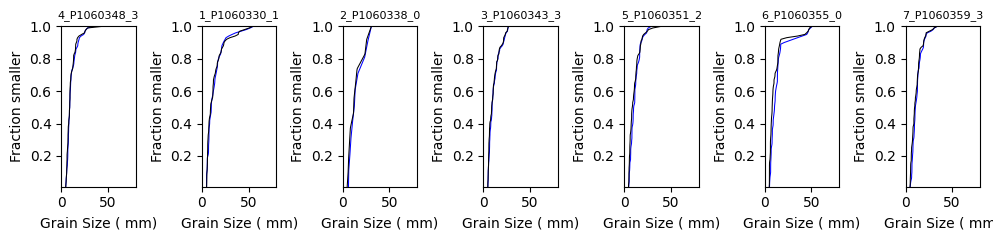

In [28]:
plt.figure(figsize=(10,2.5))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    plotting.plot_gsd(fh_gsd_l[i],color='b',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_boosted_1_pred')[0])

## Calculate percentile uncertainties

In [29]:
#number of iterations for randomization
num_it  = 1000

In [30]:
# Percentile uncertainty with bootstrapping (counting statistics only)
res_dict_bs = gsd_uncertainty.dataset_uncertainty(gsds=fh_pred_gsds,num_it=num_it,mute=True,column_name=column_name,return_results=True,sep=',',gsd_id = fh_id_l,tar_dir= data_path)
# Percentile uncertainty with Monte Carlo (counting statistics & scale, length uncertainty)
res_dict_MC = gsd_uncertainty.dataset_uncertainty(fh_pred_gsds,num_it=num_it,mute=True,column_name=column_name,method='MC',return_results=True,sep=',',gsd_id = fh_id_l,tar_dir= data_path)

ell: b-axis (mm) MC: 100%|██████████| 7/7 [02:54<00:00, 24.91s/gsd]


In [31]:
# Estimate uncertainty for ground truth 
res_dict_gt_bs = gsd_uncertainty.dataset_uncertainty(gsds=gt_mask_gsds,num_it=num_it,mute=True,column_name=column_name,return_results=True,sep=',',gsd_id = gt_id_l, tar_dir= data_path)
res_dict_gt_MC = gsd_uncertainty.dataset_uncertainty(gsds=gt_mask_gsds,num_it=num_it,mute=True,column_name=column_name,method='MC',return_results=True,sep=',',gsd_id = gt_id_l, tar_dir= data_path)

ell: b-axis (mm) MC: 100%|██████████| 7/7 [02:26<00:00, 20.88s/gsd]


### Compare uncertainty methods

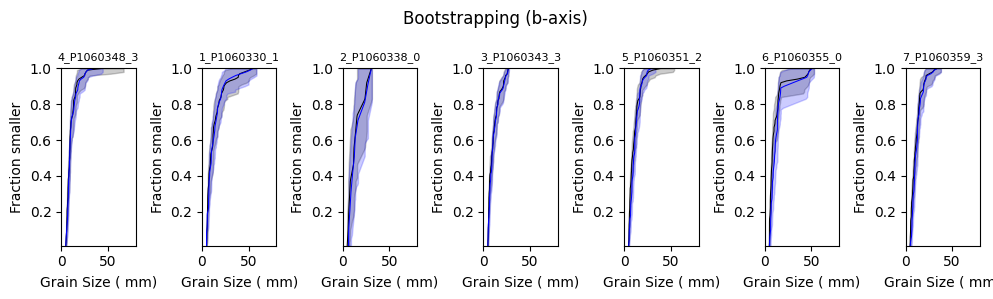

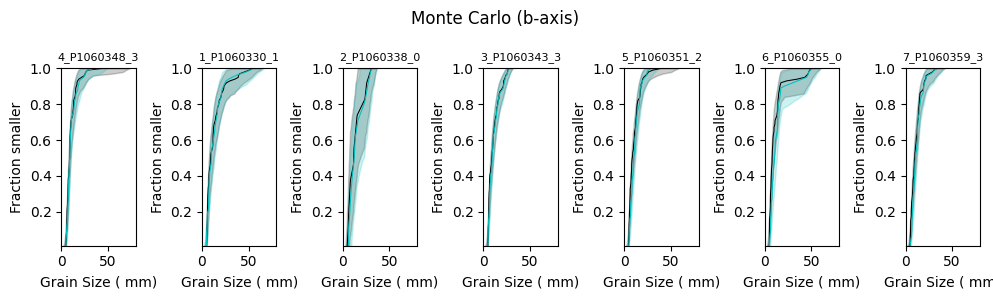

In [32]:
plt.figure(figsize=(10,3))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    #plot gt gsd for reference
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_boosted_1_pred')[0])
    #plot gt uncertainty for reference
    plotting.plot_gsd_uncert(res_dict_gt_bs[gt_id_l[i]],color='k')
    #plot gsd
    plotting.plot_gsd(fh_gsd_l[i],color='b',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    #plot uncertainty
    plotting.plot_gsd_uncert(res_dict_bs[fh_id_l[i]],color='b')
    plt.suptitle('Bootstrapping (b-axis)')

plt.figure(figsize=(10,3))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    #plot gt gsd for reference
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_boosted_1_pred')[0])
    #plot gt uncertainty for reference
    plotting.plot_gsd_uncert(res_dict_gt_MC[gt_id_l[i]],color='k')
    #plot gsd
    plotting.plot_gsd(fh_gsd_l[i],color='c',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    #plot uncertainty
    plotting.plot_gsd_uncert(res_dict_MC[fh_id_l[i]],color='c')
    plt.suptitle('Monte Carlo (b-axis)')

## Calculate grain size statistics for each image

In [33]:
summary_df = grainsizing.summary_statistics(fh_pred_gsds,fh_id_l,res_dict=res_dict_bs,data_id='fh_demo',save_summary=True)
summary_df

,Image/Masks,number of grains,D16,CI D16 (95%),D50,CI D50 (95%),D84,CI D84 (95%),D96,CI D96 (95%),unit,axis,method,grain approximation
0,4_P1060348_3_fh_boosted_1_pred_grains_re_scaled,54,17.0,[5.7 7.5],23.4,[ 8. 10.],39.9,[11.9 19.7],65.2,[17.6 42.6],mm,b-axis,bootstrapping,ellipse
1,1_P1060330_1_fh_boosted_1_pred_grains_re_scaled,40,14.6,[4.9 7.3],25.7,[ 7.5 13.7],53.1,[14.7 26.1],107.4,[21.1 58.6],mm,b-axis,bootstrapping,ellipse
2,2_P1060338_0_fh_boosted_1_pred_grains_re_scaled,11,18.3,[ 6.2 11.5],32.1,[ 7.8 23.6],64.1,[12.9 31.2],75.8,[16.4 31.2],mm,b-axis,bootstrapping,ellipse
3,3_P1060343_3_fh_boosted_1_pred_grains_re_scaled,76,14.5,[5.2 6.6],23.9,[ 8. 10.6],44.6,[14.2 22.3],66.1,[21.6 26.5],mm,b-axis,bootstrapping,ellipse
4,5_P1060351_2_fh_boosted_1_pred_grains_re_scaled,61,15.9,[5.5 7.9],26.8,[ 9.3 12.5],43.1,[14.1 19.5],62.4,[18.3 30.7],mm,b-axis,bootstrapping,ellipse
5,6_P1060355_0_fh_boosted_1_pred_grains_re_scaled,35,16.2,[5.5 7.8],26.9,[ 8.1 13.5],42.4,[13.5 45.5],119.6,[16.2 52.8],mm,b-axis,bootstrapping,ellipse
6,7_P1060359_3_fh_boosted_1_pred_grains_re_scaled,57,17.9,[6.6 8. ],27.3,[ 9.5 12.8],45.0,[13.5 21.9],69.9,[19.3 36.3],mm,b-axis,bootstrapping,ellipse
